<h1>Attention Tracker</h1>

<table>
<tr>
<th>Eleanor</th>
<th>Kevin</th>
<th>A</th>
<th>B</th>
</tr>
<tr>
<td>18.33</td>
<td>16.40</td>
<td>25</td>
<td>21</td>
</tr>
<tr>
<td>21.31</td>
<td>17.81</td>
<td>23</td>
<td>12</td>
</tr>
<tr>
<td>24.36</td>
<td>12.76</td>
<td>18</td>
<td>14</td>
</tr>
<tr>
<td>23.34</td>
<td>15.80</td>
<td>22</td>
<td>15</td>
</tr>
<tr>
<td>26.09</td>
<td>18.92</td>
<td>21</td>
<td>14</td>
</tr>
</table>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### standard deviation approach:
<br>
$$Z = \frac{x-\mu}{\sigma}$$
e.g. Z = 1
<br>
This indicates the instance is 1 standard deviation away from the mean

In [2]:
from typing import List
# approach 1: standard deviation
def is_distracted(arr:[int], std:float=None, mean:float=None, threshold:float=0.8)->List[float]:
  '''calculates potential indices where the user starts to get distracted 

  Args:
    arr: integer list indicates tracks the user's quizzes' scores (time in second). Its length must be greater than 1, otherwise it returns -1
    std: standard deviation of the list
    mean: mean/average of the list

  Returns:
    z_std: float list indicates how different each successive number is
    mask: integer list indicates if there is an improvement (the user finishes the quiz faster) for the corresponding indices (1 represents an decrease in concentration)
    std: standard deviation of the list
    mean: mean/average of the list
  '''
  if len(arr) < 2: return -1
  r_sum = np.abs([arr[i]-arr[i+1] for i in range(len(arr)-1)])
  std = np.std(r_sum) if std is None else std
  mean = np.mean(r_sum) if mean is None else mean
  z_scores = (r_sum-mean)/std
  resultant_indices = [i for i in range(len(z_scores)) if z_scores[i] >= threshold]
  return z_scores, std, mean, resultant_indices

In [3]:
arr = [18.33, 21.31, 24.36, 23.34, 26.09]
arr2 = [16.40, 17.81, 12.76, 15.80, 18.92]

In [4]:
z1,std1,mean1,indices1 = is_distracted(arr)
print(f"z1: {z1}\nstd1: {std1}\nmean1: {mean1}\nindices1: {indices1}")

print("---------------------------------------------")

z2,std2,mean2,indices2 = is_distracted(arr2)
print(f"z2: {z2}\nstd2: {std2}\nmean2: {mean2}\nindices2: {indices2}")

z1: [ 0.63622654  0.72025646 -1.71661122  0.36012823]
std1: 0.8330366138411929
mean1: 2.45
indices1: []
---------------------------------------------
z2: [-1.35331308  1.46964371 -0.08918682 -0.02714382]
std2: 1.289428167832547
mean2: 3.1550000000000002
indices2: [1]


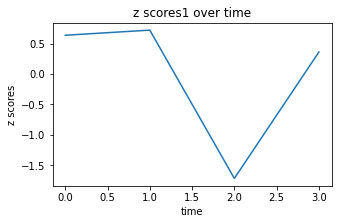

In [5]:
plt.figure(figsize=[5,3])
plt.title("z scores1 over time")
plt.xlabel("time")
plt.ylabel("z scores")
plt.plot(np.arange(len(z1)),z1);